# 计算cpk并绘图

## 导入使用到的modules

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

title = None
legendlist = []


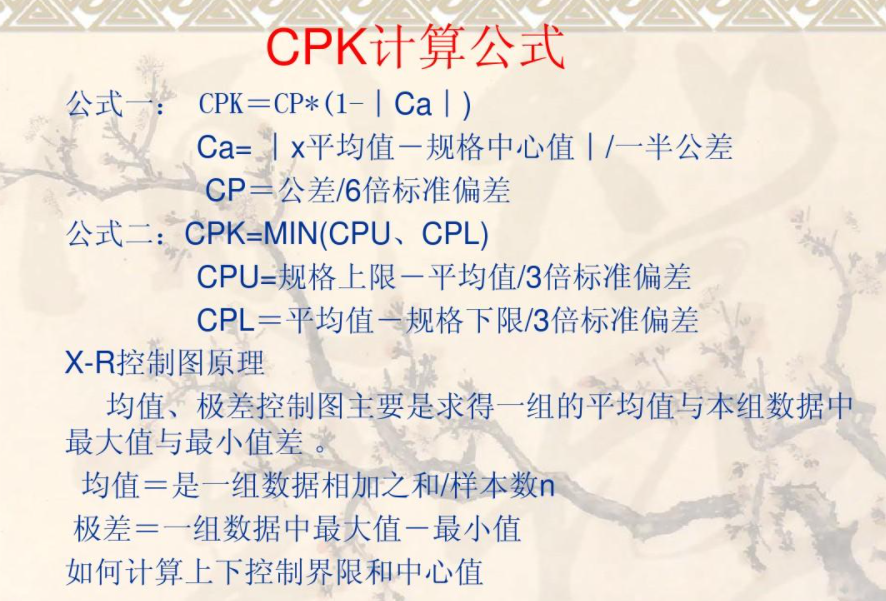

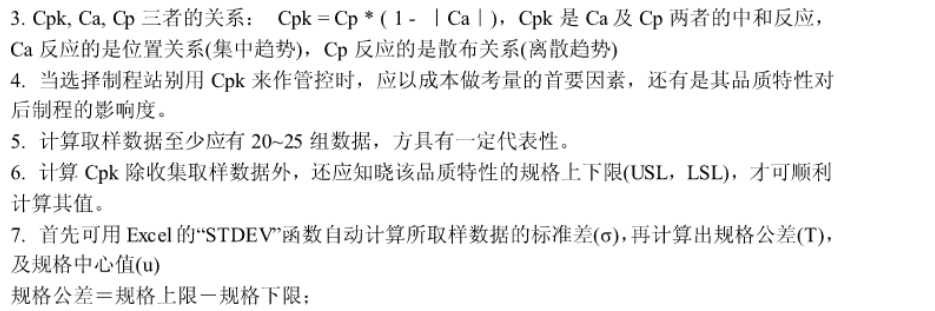

## 定义计算cpk和绘图的函数

In [16]:
def cpk_calc(df_data: pd.DataFrame, usl, lsl,serialTitle):
    """
    :param df_data: 数据dataframe
    :param usl: 数据指标上限
    :param lsl: 数据指标下限
    :return:
    """
    global title
    sigma = 3
    # 若下限为0, 则使用上限反转负值替代
    if int(lsl) == 0:
        lsl = 0 - usl
 
    # 数据平均值
    #print(type(df_data.mean()))
    #print(df_data.mean())


    u = df_data.mean()[serialTitle]

    print('mean',u)

    # 数据标准差
    stdev = np.std(df_data[serialTitle].values, ddof=1)
    print('stdev',stdev)

    # 生成横轴数据平均分布
    x1 = np.linspace(u - sigma * stdev, u + sigma * stdev, 1000)
    #print(type(x1))

    # 计算正态分布曲线
    y1 = np.exp(-(x1 - u) ** 2 / (2 * stdev ** 2)) / (math.sqrt(2 * math.pi) * stdev)
    #print(type(y1))
    
    # cp = 公差/6倍标准偏差
    cp = (usl - lsl)/(6*sigma) 

    cpu = (usl - u) / (sigma * stdev)
    cpl = (u - lsl) / (sigma * stdev)
    # 得出cpk
    cpk = min(cpu, cpl)
    
    sigma_Level = sigma * cpk
    
       
    
    print(cpu,cpl,cpk)
    # 使用matplotlib画图
    plt.xlim(x1[0] - 0.5, x1[-1] + 0.5)
    plt.plot(x1, y1)


    #plt.hist(df_data.values, 15, density=True)
    if title is None:
        title = "{0} :CPK={1},mean = {2},stdev = {3}\n".format(serialTitle,cpk,u,stdev)
    else:
        title = title + ("{0} :CPK={1},mean = {2},stdev = {3}\n".format(serialTitle,cpk,u,stdev))
    plt.title(title)
    legendlist.append(serialTitle)
    print(serialTitle)
    
    plt.legend(legendlist)


## 导入待处理的数据

In [17]:
xlsx_file = "cpkdata.xlsx"
"""
# read_excel方法读取文件
xlsx_feature = pd.read_excel(xlsx_file, usecols=[1, 2, 3, 4, 5, 6, 7]) 
#usecols属性读取excel文件中的指定列，列号从0起始；skiprows属性跳过excel文件中指定行，行号从0起始

"""
# read_excel方法返回类型为DataFrame，不需要再次转换
feature = pd.read_excel(xlsx_file, usecols=[1, 2, 3, 4, 5,6])

print(feature)

    ambient    18C    28C  after temp. cycle  storage 60C  storage -40C
0     972.9  977.9  979.6              979.9        982.2         982.9
1     973.0  977.6  978.3              977.3        980.0         977.1
2     971.6  977.6  977.5              978.5        974.5         976.7
3     976.4  980.0  979.2              980.4        980.5         975.9
4     974.6  974.8  976.2              978.6        977.2         978.2
5     970.9  977.2  974.8              977.4        974.3         974.3
6     970.9  973.0  972.3              971.6        971.2         970.0
7     974.0  978.1  978.6              982.1        981.3         981.1
8     971.6  974.2  977.0              975.1        976.9         975.8
9     971.3  974.3  976.6              975.9        976.8         975.3
10    973.1  979.1  979.0              980.0        981.1         979.3
11    974.2  979.0  975.4              979.2        980.5         977.2
12    972.0  981.8  979.7              979.0        983.0       

In [18]:
print(feature.index)

RangeIndex(start=0, stop=20, step=1)


In [19]:
print(feature.columns)
print(feature.values)

Index(['ambient', '18C', '28C', 'after temp. cycle', 'storage 60C',
       'storage -40C'],
      dtype='object')
[[972.9 977.9 979.6 979.9 982.2 982.9]
 [973.  977.6 978.3 977.3 980.  977.1]
 [971.6 977.6 977.5 978.5 974.5 976.7]
 [976.4 980.  979.2 980.4 980.5 975.9]
 [974.6 974.8 976.2 978.6 977.2 978.2]
 [970.9 977.2 974.8 977.4 974.3 974.3]
 [970.9 973.  972.3 971.6 971.2 970. ]
 [974.  978.1 978.6 982.1 981.3 981.1]
 [971.6 974.2 977.  975.1 976.9 975.8]
 [971.3 974.3 976.6 975.9 976.8 975.3]
 [973.1 979.1 979.  980.  981.1 979.3]
 [974.2 979.  975.4 979.2 980.5 977.2]
 [972.  981.8 979.7 979.  983.  979.9]
 [973.4 979.  980.7 980.8 982.8 980.9]
 [973.9 979.6 979.8 979.3 981.6 977.6]
 [972.6 976.4 977.5 977.1 977.  975.7]
 [973.7 974.8 979.3 978.3 981.1 978.4]
 [970.6 979.6 976.1 976.5 980.  977.8]
 [975.6 976.3 977.4 976.4 980.3 975.4]
 [971.3 972.6 973.1 975.5 976.  976.1]]


In [20]:
print(feature['18C'].values)

[977.9 977.6 977.6 980.  974.8 977.2 973.  978.1 974.2 974.3 979.1 979.
 981.8 979.  979.6 976.4 974.8 979.6 976.3 972.6]


In [21]:
s = feature.mean()
print(s)


ambient              972.880
18C                  977.145
28C                  977.405
after temp. cycle    977.945
storage 60C          978.915
storage -40C         977.280
dtype: float64


In [22]:

print(s.index)

Index(['ambient', '18C', '28C', 'after temp. cycle', 'storage 60C',
       'storage -40C'],
      dtype='object')


In [23]:
print(s.values)

[972.88  977.145 977.405 977.945 978.915 977.28 ]


## 处理数据并 生成cpk曲线

mean 972.8799999999998
stdev 1.6214353615173716
4.547411206348244 3.675755532075257 3.675755532075257
ambient
mean 977.1449999999998
stdev 2.5272150263627546
2.3550297875652353 2.920870044560674 2.3550297875652353
18C
mean 977.405
stdev 2.2670349288048235
2.5870796808111054 3.294317718020611 2.5870796808111054
28C
mean 977.945
stdev 2.398349212973039
2.370380413848386 3.1889990381560542 2.370380413848386
after temp. cycle
mean 978.915
stdev 3.2303291342817473
1.6597895891679246 2.4677567935934577 1.6597895891679246
storage 60C
mean 977.28
stdev 2.8134264555969164
2.0994565736439257 2.6397230508344545 2.0994565736439257
storage -40C


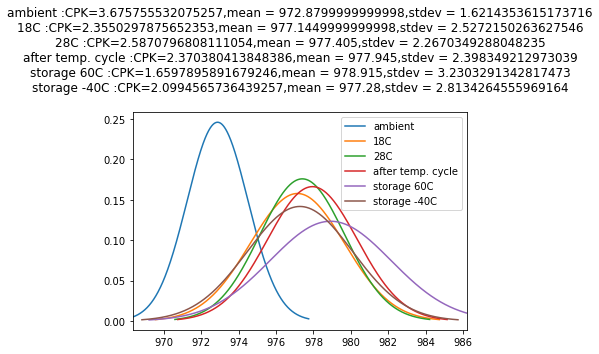

In [24]:
usl = 995
lsl = 955

for i in range(len(s.values)):
    cpk_calc(feature,usl,lsl,s.index[i])
    
# cpk_calc(feature,usl,lsl,'18C')
# cpk_calc(feature,usl,lsl,'28C')
# cpk_calc(feature,usl,lsl,'after temp. cycle')
# cpk_calc(feature,usl,lsl,'storage 60C')
# cpk_calc(feature,usl,lsl,'storage -40C')

plt.show()
